# Data Exploration

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
#Load the data
data=pd.read_csv('/Users/mac/Desktop/Sales_Prediction/advertising.csv')



In [10]:
#Display the first few rows of the dataset
print(data.head())



   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [11]:
#Display information about the dataset
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [12]:
#Display summary statistics about the dataset
print(data.describe())


       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [13]:
print(data.columns.values.tolist())


['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']


# Data Visualisation


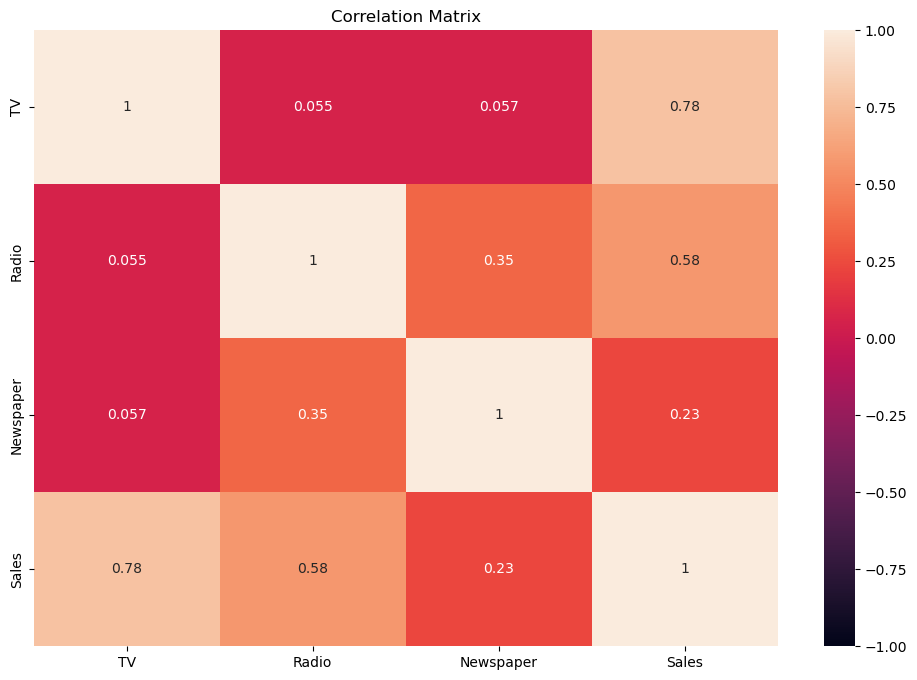

In [14]:
#dataset correlation matrix (without the unnamed column)
data=data.drop(data.columns[0], axis=1)
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()



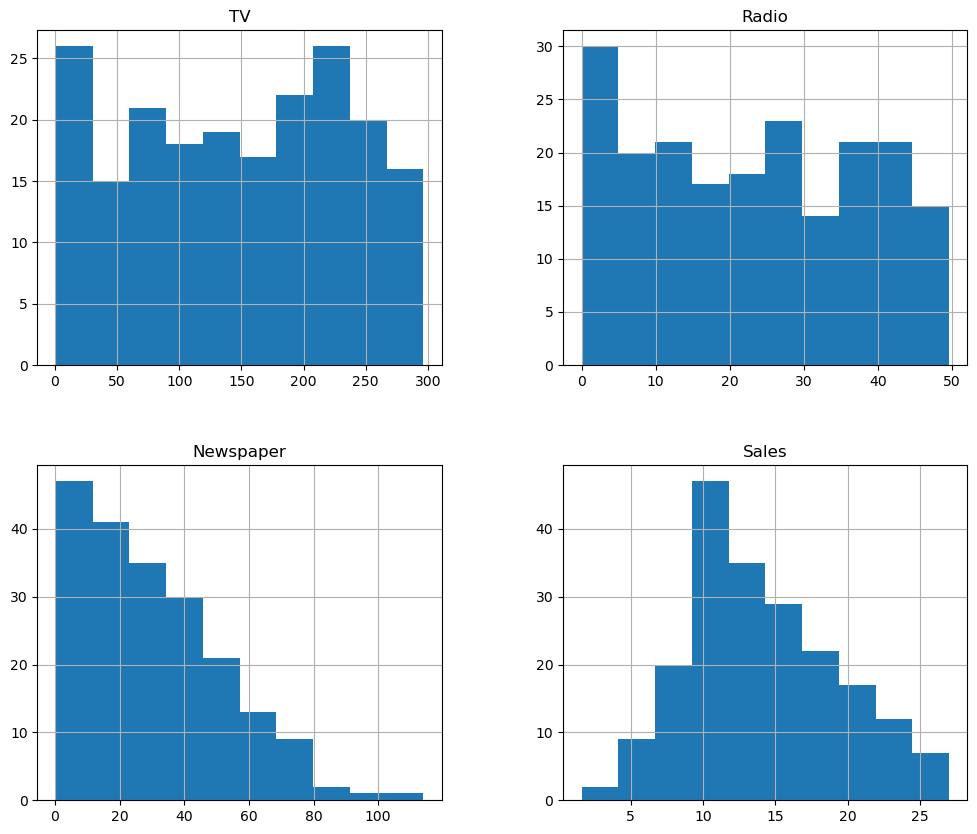

In [15]:
data.hist(figsize=(12, 10))
plt.show()

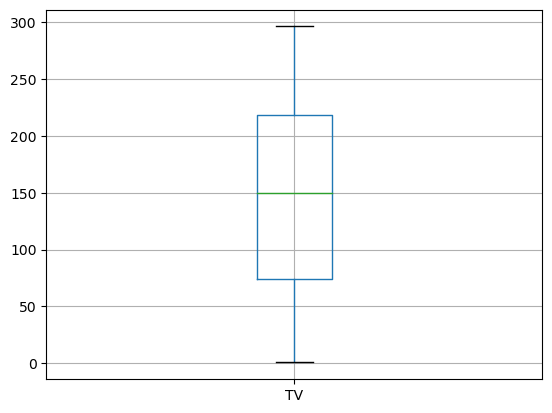

In [16]:
data.boxplot(column='TV')
plt.show()


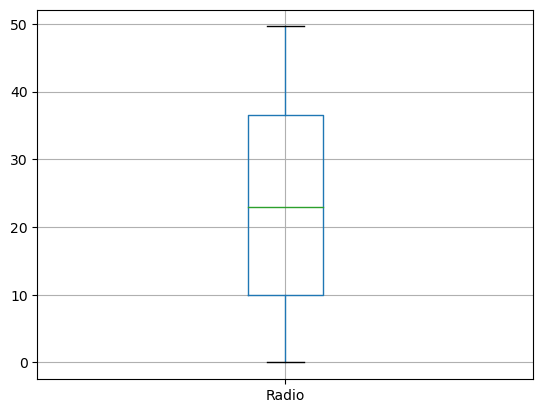

In [33]:
data.boxplot(column='Radio')
plt.show()


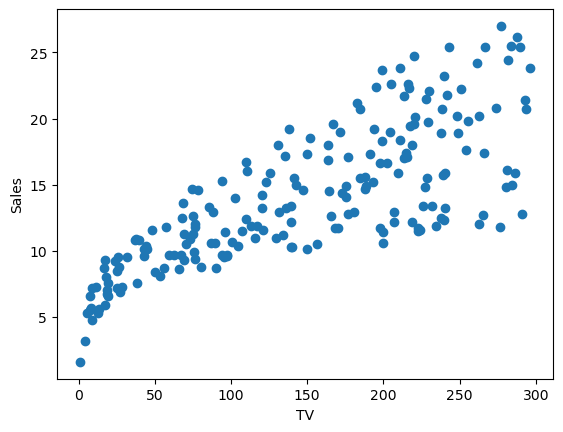

In [34]:
plt.scatter(data['TV'], data['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()


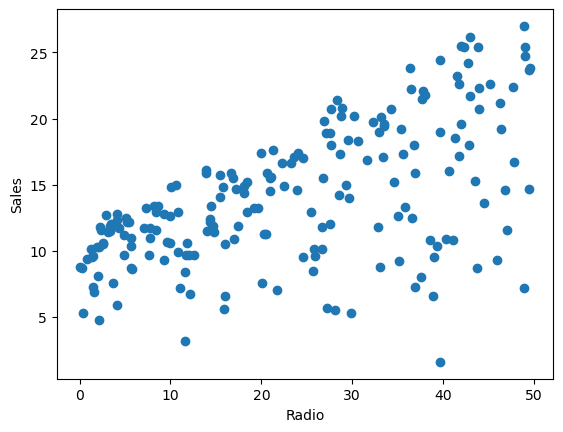

In [35]:
plt.scatter(data['Radio'], data['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

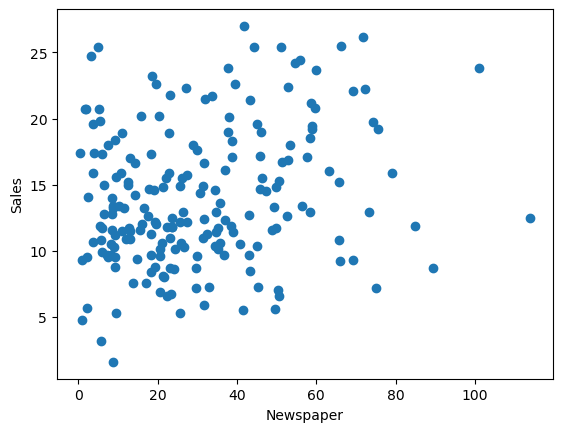

In [36]:
plt.scatter(data['Newspaper'], data['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()


In [37]:
#IQR (Interquartile Range) Method for 'TV':

q1 = data['TV'].quantile(0.25)
q3 = data['TV'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data['TV'] < lower_bound) | (data['TV'] > upper_bound)]


In [38]:
#IQR (Interquartile Range) Method for 'Radio':
q1 = data['Radio'].quantile(0.25)
q3 = data['Radio'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data['Radio'] < lower_bound) | (data['Radio'] > upper_bound)]


In [39]:
#IQR (Interquartile Range) Method for 'Newspaper':
q1 = data['Newspaper'].quantile(0.25)
q3 = data['Newspaper'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data['Newspaper'] < lower_bound) | (data['Newspaper'] > upper_bound)]


In [40]:
# Features importance (correlation between the features and the target variable)
correlations = data.corr()['Sales'].abs().sort_values(ascending=False)
print(correlations)


Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64


In [52]:
from sklearn.model_selection import train_test_split
X = data.drop('Sales', axis=1)  # Features (all columns except 'sales')
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160, 3)
X_test shape: (40, 3)
y_train shape: (160,)
y_test shape: (40,)


# Choosing the model

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [54]:
# Create a linear regression model object
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)  # Adjust alpha as needed

In [55]:
# Fit the model on the training data
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [56]:
y_pred = model.predict(X_test)


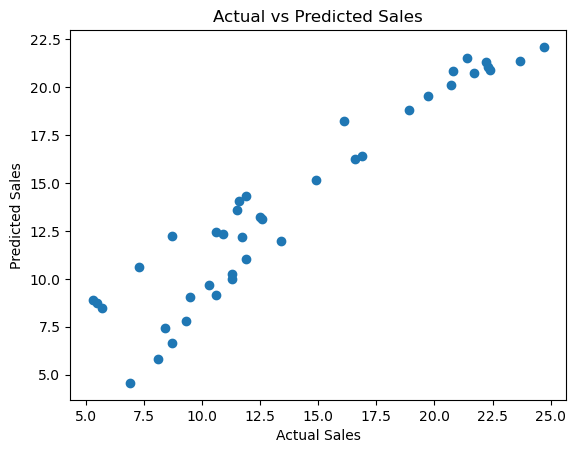

In [57]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


In [60]:
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds (e.g., 5 or 10)
k = 5

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Empty lists to store evaluation metrics
mse_scores = []
r2_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X):
  # Subset data based on integer indexes (assuming X has integer indexes)
  X_train_fold = X.iloc[train_index]  # Defined within the loop
  X_test_fold = X.iloc[test_index]
  y_train_fold = y.iloc[train_index]
  y_test_fold = y.iloc[test_index]

  # Train the model on the training set
  model.fit(X_train_fold, y_train_fold)

  # Make predictions on the testing set
  y_pred_fold = model.predict(X_test_fold)

  # Calculate evaluation metrics (e.g., MSE, R-squared)
  mse = mean_squared_error(y_test_fold, y_pred_fold)
  r2 = r2_score(y_test_fold, y_pred_fold)

  # Append metrics to lists for later analysis
  mse_scores.append(mse)
  r2_scores.append(r2)

# Calculate and print average metrics (using the accumulated scores)
print("Average Mean Squared Error:", np.mean(mse_scores))
print("Average R-squared:", np.mean(r2_scores))

Average Mean Squared Error: 2.965087949469445
Average R-squared: 0.8827304289150577


In [61]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 44.905209392464755
R-squared: -0.6069861574100914


In [51]:
print(train_index[:5])
print(test_index[:5])

[0 2 3 4 5]
[ 1 14 20 21 37]
